___
# <font color=#EEAA11> HW #5: Visualization </font>



____

## <font color=#00BBFF> Problem #1 (10 pts) </font>

In this problem you are going to explore making a parallel plot using Pandas. In general, the plotting in Pandas is not the best; but, sometimes you just want to do quick EDA only with Pandas without dealing with other libraries.

🤓 Follow these steps:
* pick a dataset and put it into a dataframe,
* make a parallel plot using Pandas's `parallel_coordinates`,
* make at least two versions by choosing how you color the lines, (e.g., coloring by a categorical variable),
* think about what conclusions you would draw about your dataset from these explorations,
* scale the data using a z-score, and remake the parallel plot,
* does the scaling aid in the visualization process? if so, how? if not, why not? (the answer will depend on the dataset you choose! compare two datasets, and not penguins)

____

**If** you want some helper code, look the code below. **If** you use it, comment every line and ensure that it is PEP-8 compliant, and adapt it to your choice of dataset. (You might see if you can use the dataset you plan to use for your project, although it may not make sense in this context.)

Text(0.5, 1.0, 'with zscore')

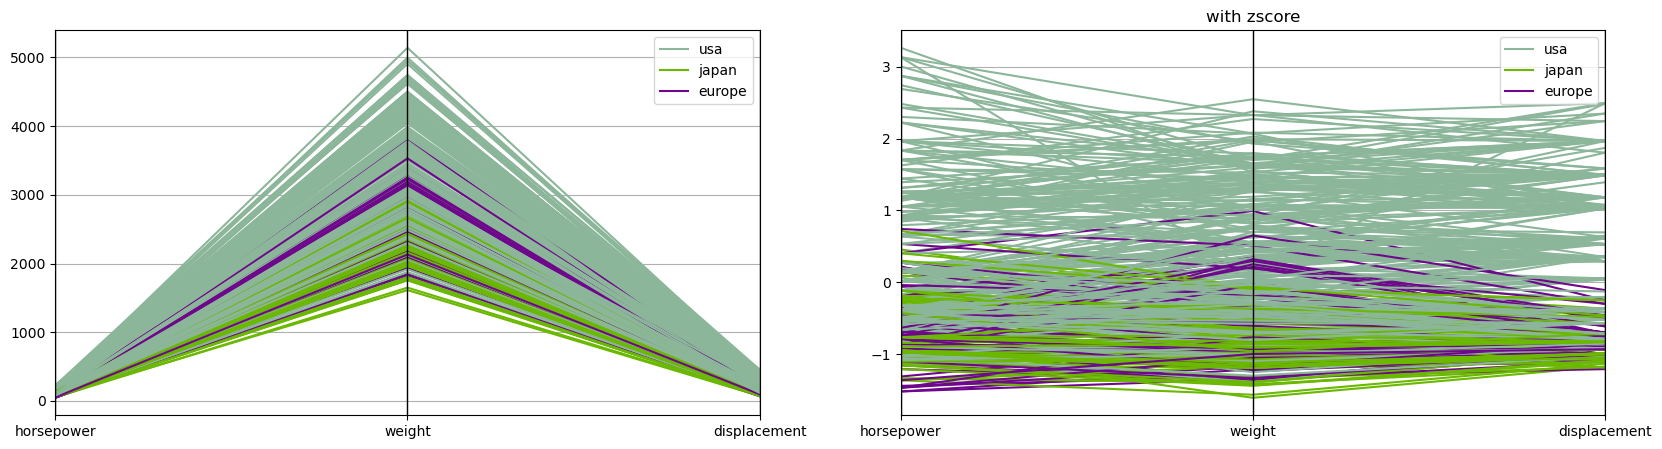

In [42]:
import seaborn as sns
import pandas as pd
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt

f, (a1, a2) = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))

# choose the mpg dataset
df_mpg = sns.load_dataset("mpg").dropna()

df_mpg


pd.plotting.parallel_coordinates(
    df_mpg[
        [ "origin",
            "horsepower",
            "weight",
            "displacement",
            
        ]
    ],
    "origin",
    ax=a1,
)

numeric_cols = df_mpg.select_dtypes(include=[np.number]).columns

df_mpg_s = df_mpg[numeric_cols].apply(zscore)

df_mpg_s["origin"] = df_mpg["origin"]
pd.plotting.parallel_coordinates(df_mpg_s[
        [
            "origin",
            "horsepower",
            "weight",
            "displacement",
            
        
        ]]
    , "origin", ax=a2)
plt.title("with zscore")


<class 'numpy.int64'>


Text(0.5, 1.0, 'with zscore')

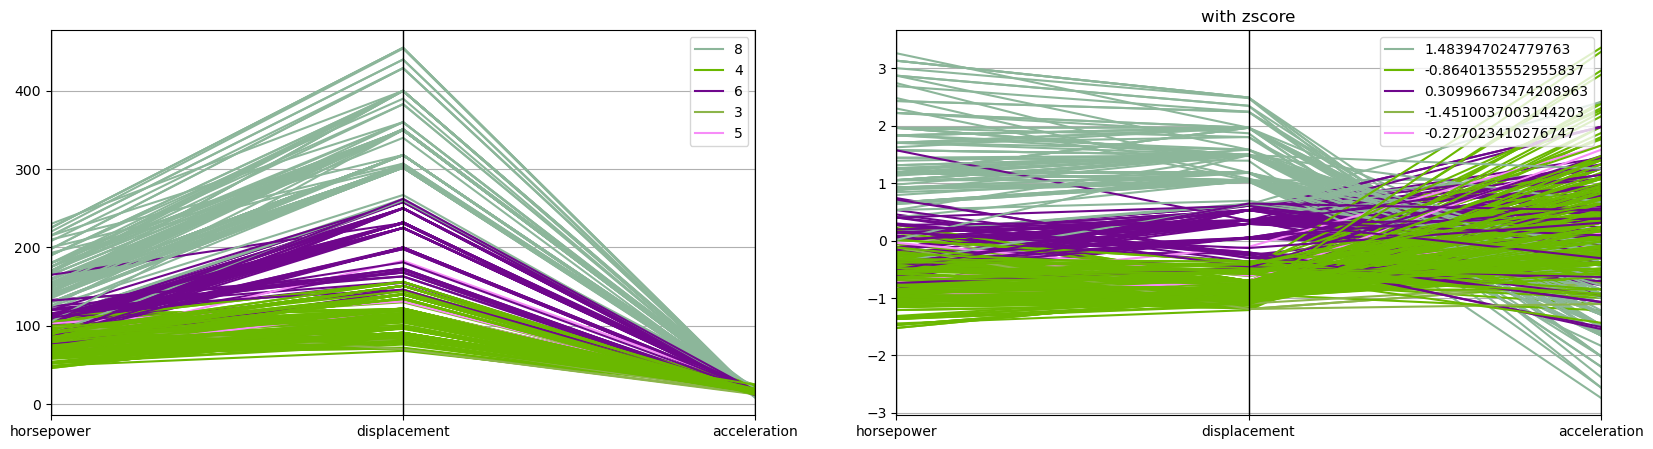

In [41]:
f, (a1, a2) = plt.subplots(ncols=2, nrows=1, figsize=(20, 5))


print(type(df_mpg["cylinders"][0]))
pd.plotting.parallel_coordinates(
    df_mpg[
        ["cylinders", "horsepower", "displacement", "acceleration"]
    ],
    "cylinders",
    ax=a1,
)
numeric_cols = df_mpg.select_dtypes(include=[np.number]).columns

df_mpg_s = df_mpg[numeric_cols].apply(zscore)

df_mpg_s["origin"] = df_mpg["origin"]
pd.plotting.parallel_coordinates(
    df_mpg_s[
        ["cylinders", "horsepower", "displacement", "acceleration"]
    ],
    "cylinders", ax=a2)
plt.title("with zscore")

does the scaling aid in the visualization process? if so, how? if not, why not?

🤔 Yes the scaling affects the visualization, it clearly shows the change in the acceleration for the data when change in horsepower, but the unscaled value is hard to interpret because of different scale and size here the acceleration value is plotted against displacement the acceleration values cannot be easily interpreted from the plot. 

In [5]:
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


____

## <font color=#00BBFF>  Problem #2 (10) </font>

Next, we are going to compare the previous result with HiPlot, which is a library specifically designed for exploring high-dimensional datasets. It tends to look better, have more features and _-- most importantly for EDA --_ it is interactive.

🤓 Follow these steps:
* install [HiPlot](https://github.com/facebookresearch/hiplot) on your machine,
* read the documentation to understand how to use HiPlot with a dataframe,
* open HiPlot in your notebook with a dataset you explored in the previous problem,
* play with HiPlot so that you know how to use its most important features:
  * how do you select a portion of one of the vertical axes?
  * how do you slide the range box vertically to select different portions of the data?
  * can you select (with the gray boxes) different ranges on different vertical axes?
  * how do you reorder the vertical axes?
  * what use the dataframe below the plot? what happens if you mouse over the rows?
  * for your dataset, set the order of the vertical axes to correspond to a narrative/story, and describe that in a markdown cell - image you are using such a plot for your project and you want to tell a specific story.

If you find HiPlot useful, consider using it in your project. [It works with streamlit.](https://facebookresearch.github.io/hiplot/tuto_streamlit.html)

In [43]:
import hiplot as hip
print(f"HiPlot=={hip.__version__}")

HiPlot==0.1.33


In [48]:
hip.Experiment.from_dataframe(df_mpg).display()

<IPython.core.display.Javascript object>


how do you select a portion of one of the vertical axes?

🤔 You can select it by clicking on the axis label on the left side of the plot. The selected axis will become highlighted.

how do you slide the range box vertically to select different portions of the data?

🤔 To select different portions of the data on the vertical axis, position your mouse cursor inside the selection box. When your cursor changes to a vertical arrow icon, click and hold the mouse button. Now, you can slide the range box up or down along the axis to choose a different range of values.


can you select (with the gray boxes) different ranges on different vertical axes?

🤔 we can select a different range on a different vertical axis, by clicking on the label of that axis to highlight it. by clicking and dragging along the new axis to create a selection box for that axis.


how do you reorder the vertical axes?

🤔 we can click and drag the selected vertical axes to reorder


what use the dataframe below the plot? what happens if you mouse over the rows?

🤔 onmouse hover of the row the specific mapping is highlighted on the plot above


for your dataset, set the order of the vertical axes to correspond to a narrative/story, and describe that in a markdown cell - image you are using such a plot for your project and you want to tell a specific story.


🤔 By arranging the axes in this order, we can tell a story about how the engine's horsepower and the weight of the vehicle affect its fuel efficiency. 


____

## <font color=#00BBFF>  Problem #3 (30) </font>

It is time to start working on your project!

And, it is time to pay attention to the calendar! Your projects presentations will be the week of Oct. 16, which is only two weeks away. The following week is Fall Break. The next week, the week I am away, we will start diving more into the mathematics of data science.

Hopefully the HWs have prepared you for your project. Here is the schedule:
* just a reminder: I am out of town the week of October 30-November 3, but you'll have a guest instructor on probabilty and statistics; the week will be normal otherwise,
* the next week (October 23 and 24) is Fall Break - we don't meet on Monday of that week,
* your projects are due at the end of that week: in D2L by midnight on Friday, October 27th,
* during the week of Oct. 16, you will present your projects to the other members of your class; the procedure will be:
  * the presentations will happen on Wednesday, October 18th. the order of presentations will be random, so you might be presenting first on that day (be ready and arrive to the class on time! no excuses! 😉),
  * for the presentations, we are going with 12 groups of 4 and 5, which will be announced by Mahyar on the day of presentation,
  * during the presentations, you will listen to some of the presentations and interact (e.g., ask questions) with the person speaking,
  * you will complete a report of the speakers that you listened to and turn that in (to D2L as a pdf file).

So that you have a full, restful Fall Break, there will be no homework that week; and, your midterm project will have been completed the prior week.

Here are the requirements for your project. Note that these requirements may not apply to each student perfectly, because you all have some flexibility in how you design your project. If there are any special issues with your project (e.g., the data is proprietary), please let me know so that we can work with your situation.
* your project will be a streamlit app with two levels of interactivity:
  * in streamlit (e.g., through sliders, dropdowns, etc.),
  * in the visualizations themselves (e.g., using Altair or HiPlot),
  * you must have a goal, a message, a story -- there should be a point to what you are doing,
  * the app should contain any necessary text that aids the user to understand and explore your story,
  * the app should be deployable from your code at Github, and your streamlit link should be sent to Mahyar by Wed before class (do not send the link for the Github repository).

  A good example [is here](https://caron14-streamlit-linearregression-boston-house-prices-m9mvyd.streamlitapp.com) - try to be at least this complete in your app.

  As always, please contact us, or use Slack, with any issues that arise!

  🤓 For this HW, you are going to write an essay that is 500 to 1000 words. Use the [best markdown practices](https://www.markdownguide.org/cheat-sheet/), and put everything in a cell below. (You can use one plot, but no more.) What you will write is a proposal for your project. Include this in your proposal:
  1. What is the goal, what is the point? What is the "big-picture" question you are trying to answer? Who cares? Why do they care?
  2. Discuss which datasets you have looked at toward this goal. Which ones did you reject and why? Which dataset did you finally choose?
  3. Describe the dataset. What is in it? Where did it come from? Are there issues, such as missingness? If so, what type (e.g., MNAR)?
  4. What preliminary studies have you done? Do they look promising?
  5. What will your web app do? How will this be useful to people?
  6. What visualization tools do you plan on using? Why did you choose these? How will they serve the goal you outlined in step 1?
  7. Summarize with why you think this is a project worthy of completing.

  In your writing, use the best rules of English grammar, punctuation and formatting. Be sure you edit the proposal a few times before submitting it. It should be very clear, easy to read and convincing.

  Here is the logic I want you to have. The goal of the project is to present your data to someone else you don't know and who does not know very much about data science. You could imagine a scenario in which you work at a large company and are the data scientist. You are asked to design and build a web app for a mostly non-technical manager with the goal that they engage with the data as a "dashboard", perhaps as a way to report to them on what your team has done and why it is interesting an important. Thus, it is important that you understand the narrative that goes with your data, choose the best visualization to display your ideas, and layout the app in a way that is logical for a user you have never met.
  




1. What is the goal, what is the point? What is the "big-picture" question you are trying to answer? 

# <font color=#18453B>Goal</font>

>The goal of this project is to analyze the death rates of different countries and identify the underlying reasons contributing to variations in death rates. The big-picture question is understanding the factors that influence mortality rates across countries.


## Who cares? Why do they care?

> * **Public Health Officials**: Understanding the factors affecting death rates is crucial for public health >officials to develop effective policies and interventions to improve health outcomes.

> * **Economists:** Variations in death rates can impact economic productivity and healthcare expenditures. >Economists are interested in the economic implications of these variations.

> * **Researchers and Academics**: This project can provide valuable insights for researchers studying global health disparities and epidemiology.

> * **General Public:** People are naturally concerned about health outcomes and mortality rates, and this information can be relevant to individuals planning their lives and making health-related decisions.

---
2. Discuss which datasets you have looked at toward this goal. Which ones did you reject and why? Which dataset did you finally choose?

> I tried to analyse crime rate data and death rate data, I beleive the health data could provide more valuable information on a global level improving lives of people and the health policies can be globally formed and countries could identify the potential areas of improvement in the betterment of their nations people
  
---

3. Describe the dataset. What is in it? Where did it come from? Are there issues, such as missingness?


 # <font color=#18453B> Data</font>

> **World Health Organization (WHO) Data:** This dataset contains comprehensive health-related data for various countries, including death rates, causes of death, healthcare infrastructure, and more. This dataset was chosen due to its richness and credibility. [WHO data api](https://www.who.int/data/gho/info/gho-odata-api)

> **World Bank Data:** While the World Bank provides a wide range of socio-economic data, it was not chosen for the core analysis as it lacks specific health-related variables compared to the WHO dataset.[Worldbank api](https://genderdata.worldbank.org/indicators/sp-dyn-amrt/?view=correlation)

> **Kaggle Data**  the data for various causes of death between different countries [Dataset csv file](https://www.kaggle.com/datasets/iamsouravbanerjee/cause-of-deaths-around-the-world)


## Data description

> The selected dataset is sourced from the World Health Organization (WHO) and includes data on death rates (overall and by specific causes) for different countries. It also contains information on healthcare infrastructure, population demographics, and other variables that can influence death rates. 

>The dataset is relatively comprehensive but may have issues, such as missing data, that need to be addressed. most of the missing data is from the adequate information for certain periods, and specific conditions from certain countries, due to the lack of 

---

 4. What preliminary studies have you done? Do they look promising?
 
 # <font color=#18453B> Preliminary study</font>

>Preliminary analysis of the dataset has been conducted to understand the distribution of death rates, identify potential outliers, and explore correlations between death rates and various factors. Initial findings may indicate correlations with factors like healthcare access, income levels, and infectious disease prevalence, which are promising avenues for further exploration,An analysis of overall death rates demonstrated significant variability, with some countries reporting substantially higher rates than others. Further exploration indicated a correlation between death rates and certain socio-economic factors, such as healthcare access and income levels. Notably, countries with lower healthcare infrastructure and income levels tended to exhibit higher death rates. These preliminary findings suggest potential avenues for deeper investigation to better understand the underlying factors driving variations in death rates and to develop targeted interventions aimed at improving public health outcomes.

---

 5. What will your web app do? How will this be useful to people?

 # <font color=#18453B>  Web app functionality </font>

>The web app will allow users to interactively explore death rate data for different countries. Users can select countries, time periods, and specific causes of death to visualize trends and patterns. The app will also offer statistical analysis tools to identify significant correlations between death rates and various contributing factors. to interactively select countries, time frames, and specific causes of death to visualize trends and patterns. The app will provide a wide array of tools for statistical analysis, enabling users to identify significant correlations between death rates and various contributing factors such as healthcare access, income levels, and disease prevalence. With intuitive and dynamic visualizations, this web app aims to empower researchers, policymakers, and the general public with valuable insights into the complex factors influencing mortality rates worldwide, ultimately aiding in the development of informed policies and interventions to improve global health outcomes.

---

 6. What visualization tools do you plan on using? Why did you choose these?

> # <font color=#18453B>  Visualization tools</font>

>1. **Matplotlib and Seaborn:** These Python libraries will be used for creating static and interactive visualizations. They are widely used for data exploration and presentation.

>2. **Tableau:** Tableau can be used to create dynamic and interactive dashboards for data exploration.

>3. **Plotly:** Plotly offers interactive, web-based visualizations that can enhance user engagement and understanding of the data.

>4. **HiPlot:** HiPlot, as discussed earlier, can be useful for exploring multivariate data and identifying trends and patterns.

---
 
 7. Summarize with why you think this is a project worthy of completing.

 # <font color=#18453B>  Worthy of completion</font>


>This project is valuable because it addresses a significant real-world problem: understanding and potentially mitigating disparities in death rates across countries. By providing insights into the factors contributing to these disparities, the project can inform policy decisions, public health interventions, and research efforts aimed at improving global health outcomes. Additionally, the interactive web app will make this information accessible and usable to a wide range of stakeholders, including researchers, policymakers, and the general public, further amplifying its impact.





